## Importing the Halo Pipeline
In this section, we'll show the import statement and the initialization of the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

We first create an instance of the `HalosSkyPyPipeline` class, which is imported from the `sim_pipeline.Pipelines.halos_pipeline` module. This pipeline will be used to process data from the YAML file, `halo.yml`. The default settings for various parameters, such as `m_max`, `m_min`, etc., have been carefully chosen to ensure optimal performance and accurate results. We'll delve into the specifics of these parameter choices and their importance in the subsequent sections. Additionally, you can refer to the `readme.md` file in the `data/Skypy` folder for more information on the default settings.

In [1]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline(sky_area=0.0001,m_max='1.0E+16',m_min='1.0E+12',z_max=5.00)

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

        z                 mass       
------------------ ------------------
2.1513742810662766  4475863975666.485
0.6965252619814613 2804543165857.9688
2.4519854398221144 1050946461854.0662
1.7079509090598242  3619691010918.868
 3.680448264230611  2222192787019.027
1.5658362011725837  7260698098847.944
 3.103818579841844 2896250470159.8936
 4.347286744588007 1159525628407.6594
1.5703694930889565  15596667151163.68
1.0068056117757713  3119016379135.328
               ...                ...
 3.225248437988829  10003645709019.52
0.3447264884137996 1165021124517.6882
2.7657247598848507 1391147450710.3792
 2.240811958423107 2675712484463.5557
 1.674171006819225  9060137577939.535
2.8288789332036743 1024957814736.4733
 2.708103768387942  4586253739132.806
 1.547520268236179 2199487661274.8306
 1.824329383833478 2860188690617.7944
2.3288077918843086 2024305531209.4265
1.1856584444727967 1203618678321.6587
Length = 50 rows


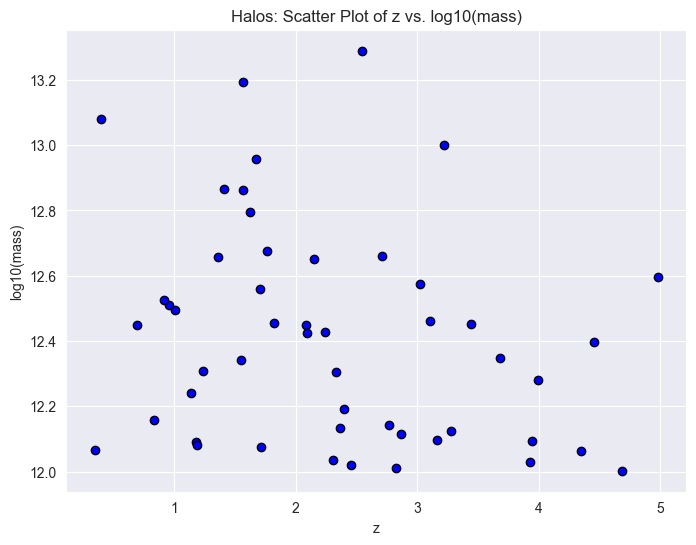

         z                   kappa         
------------------- -----------------------
              0.025  0.00013397902836150057
0.07500000000000001 -0.00043862369117280363
0.12500000000000003  -0.0013972477556442261
0.17500000000000002  -0.0026409562548218675
0.22500000000000003   -0.004084773702519722
 0.2750000000000001   -0.005657705368735326
0.32500000000000007   -0.007300958585450095
 0.3750000000000001   -0.008966349481380522
 0.4250000000000001   -0.010614879620253623
 0.4750000000000001   -0.012215467994738962
                ...                     ...
  4.475000000000001  -0.0004945751994291925
  4.525000000000001  -0.0004290266397397602
  4.575000000000001 -0.00036511029738406364
  4.625000000000001   -0.000302460417366035
  4.675000000000002 -0.00024126759153197952
  4.725000000000001 -0.00018250666520280845
  4.775000000000001  -0.0001282145560370651
  4.825000000000001  -8.182491892227972e-05
  4.875000000000001  -4.856721161416999e-05
  4.925000000000002 -3.593836988

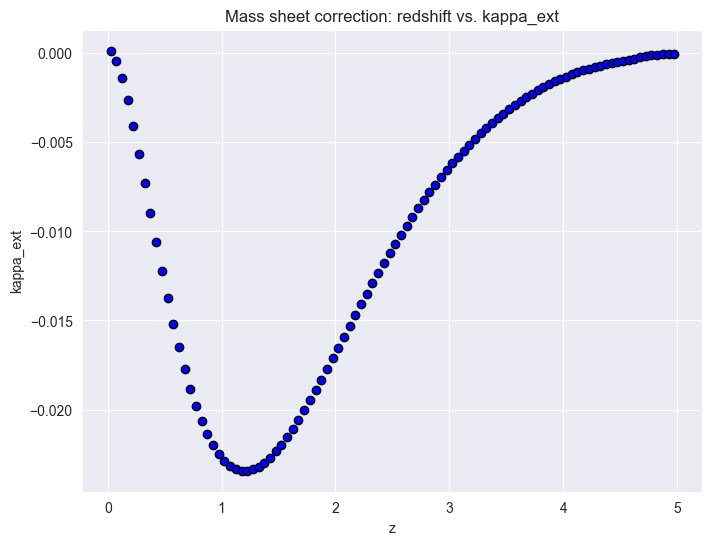

In [2]:
import matplotlib.pyplot as plt
import numpy as np

halos= pipeline.halos
mass_sheet_correction = pipeline.mass_sheet_correction
print(halos)
z_halos = halos['z']
mass_halos = halos['mass']

log_mass = np.log10(mass_halos)
plt.figure(figsize=(8, 6))
plt.scatter(z_halos, log_mass, c='blue', marker='o', edgecolors='black')
plt.title('Halos: Scatter Plot of z vs. log10(mass)')
plt.xlabel('z')
plt.ylabel('log10(mass)')
plt.grid(True)

# Show the plot
plt.show()
print(mass_sheet_correction)
redshifts_mass_correction = mass_sheet_correction['z']
#first_moment = mass_sheet_correction['first_moment']
kappa_ext = mass_sheet_correction['kappa']
plt.figure(figsize=(8, 6))
plt.scatter(redshifts_mass_correction, kappa_ext, c='blue', marker='o', edgecolors='black')
plt.title('Mass sheet correction: redshift vs. kappa_ext')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.grid(True)



## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence $ \kappa $ and shear $ \gamma_1$, $\gamma_2 $ (or shear $\gamma_{tot}$) at the origin due to all the halos.

In [3]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.Halos.halos_lens import HalosLens
from lenstronomy.Cosmo.lens_cosmo import LensCosmo
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(halos_list=halos,mass_correction_list= mass_sheet_correction,sky_area=0.0001,cosmo=cosmo, samples_number= 1000)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa,gamma1,gamma2 = halos_lens.get_convergence_shear(gamma12=True) #when gamma12=False,return kappa,gamma_tot
print('kappa at center is: ',kappa)
print('gamma1 at center is: ',gamma1)
print('gamma2 at center is: ',gamma2)
'''
lens_cosmo = [
                LensCosmo(
                    z_lens=z,
                    z_source=5.00,
                    cosmo=cosmo,
                )
                for z in redshifts_mass_correction
            ]

halos_lens2 = HalosLens(halos_list=halos,mass_correction_list= mass_sheet_correction,sky_area=0.0001,cosmo=cosmo, samples_number= 1)
kappa_ext = halos_lens2.kappa_ext_for_mass_sheet(z=redshifts_mass_correction, lens_cosmo=lens_cosmo, first_moment=first_moment)
print(kappa_ext)
print('kappa_ext at center is: ',kappa_ext)

plt.figure(figsize=(8, 6))
plt.scatter(redshifts_mass_correction, kappa_ext, c='blue', marker='o', edgecolors='black')
plt.title('Mass sheet correction: redshift vs. kappa_ext')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.grid(True)
'''

C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


kappa at center is:  -0.013059315790353632
gamma1 at center is:  0.03703264345310525
gamma2 at center is:  -0.2530760387421319


"\nlens_cosmo = [\n                LensCosmo(\n                    z_lens=z,\n                    z_source=5.00,\n                    cosmo=cosmo,\n                )\n                for z in redshifts_mass_correction\n            ]\n\nhalos_lens2 = HalosLens(halos_list=halos,mass_correction_list= mass_sheet_correction,sky_area=0.0001,cosmo=cosmo, samples_number= 1)\nkappa_ext = halos_lens2.kappa_ext_for_mass_sheet(z=redshifts_mass_correction, lens_cosmo=lens_cosmo, first_moment=first_moment)\nprint(kappa_ext)\nprint('kappa_ext at center is: ',kappa_ext)\n\nplt.figure(figsize=(8, 6))\nplt.scatter(redshifts_mass_correction, kappa_ext, c='blue', marker='o', edgecolors='black')\nplt.title('Mass sheet correction: redshift vs. kappa_ext')\nplt.xlabel('z')\nplt.ylabel('kappa_ext')\nplt.grid(True)\n"

In [5]:
'''
result = ", ".join(map(str, first_moment))

print(result)
'''

'\nresult = ", ".join(map(str, first_moment))\n\nprint(result)\n'

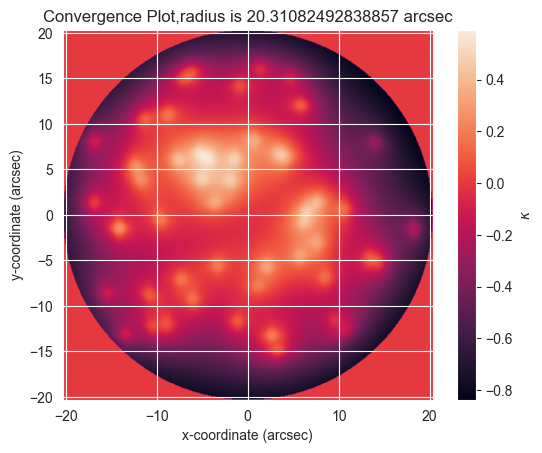

In [4]:
halos_lens.plot_convergence()

### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [6]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True, diff=None)
print(kappa_gamma_distribution)

[[-0.76573903  0.09140916]
 [-0.44573321  0.14986914]
 [-0.86774171  0.1484969 ]
 ...
 [-0.7013086   0.19419468]
 [-0.52934738  0.11019064]
 [-0.77359527  0.31746829]]


### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

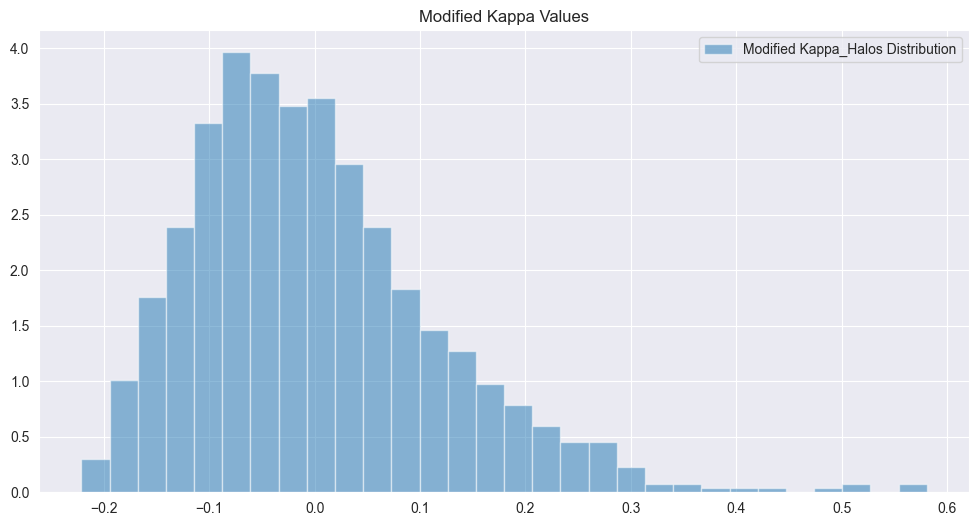

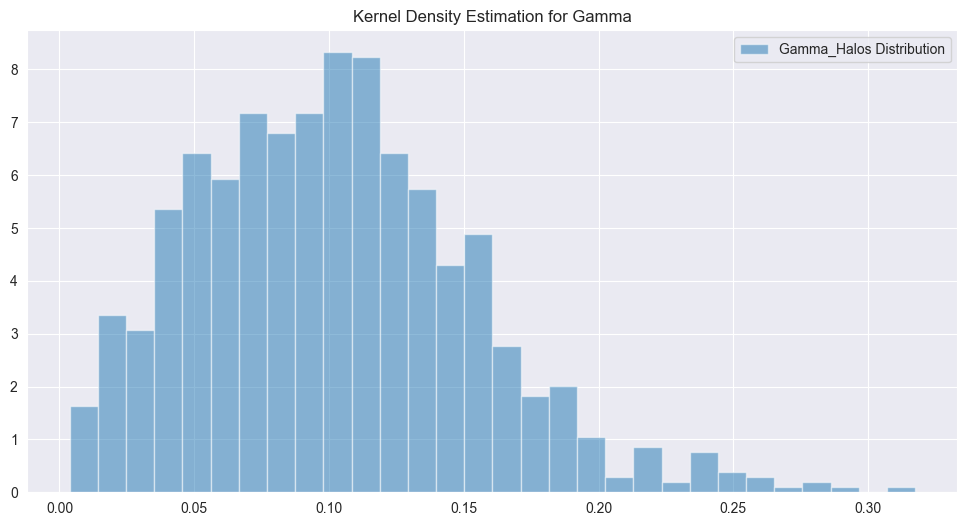

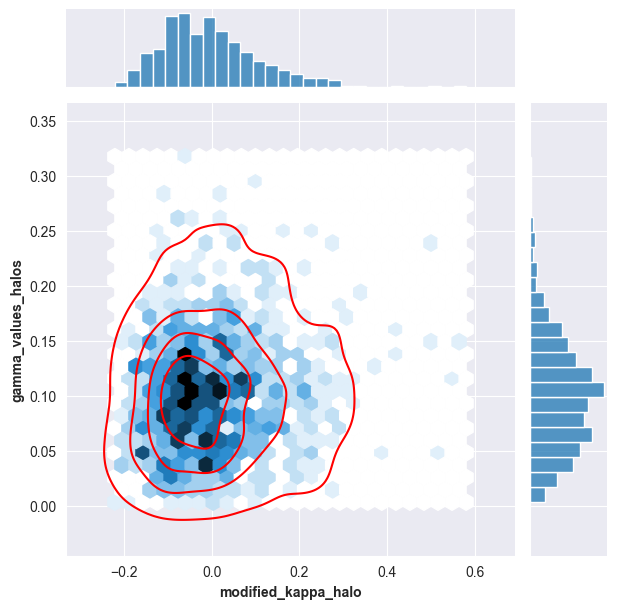

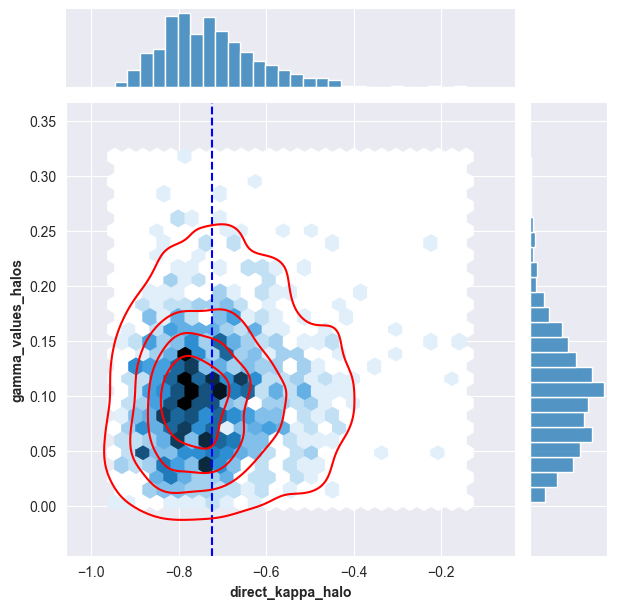

Spearman correlation coefficient:  0.08221235821235821
Kendall Tau correlation coefficient:  0.05497897897897898


In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

kappa_gamma_distribution = np.array(kappa_gamma_distribution)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

plt.figure(figsize=(12, 6))
plt.hist(modified_kappa_halos, bins=30, density=True, alpha=0.5, label='Modified Kappa_Halos Distribution')
plt.title('Modified Kappa Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(gamma_values_halos, bins=30, density=True, alpha=0.5, label='Gamma_Halos Distribution')
plt.title('Kernel Density Estimation for Gamma')
plt.legend()
plt.show()

modified_plot = sns.jointplot(x=modified_kappa_halos, y=gamma_values_halos,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('modified_kappa_halo', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

unmodified_plot = sns.jointplot(x=kappa_values_halos, y=gamma_values_halos,kind='hex')
unmodified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
unmodified_plot.ax_joint.axvline(x=mean_kappa, color='blue', linestyle='--')
unmodified_plot.ax_joint.set_xlabel('direct_kappa_halo', fontweight='bold')
unmodified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

from scipy.stats import spearmanr, kendalltau
print('Spearman correlation coefficient: ', spearmanr(modified_kappa_halos, gamma_values_halos)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(modified_kappa_halos, gamma_values_halos)[0])

Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

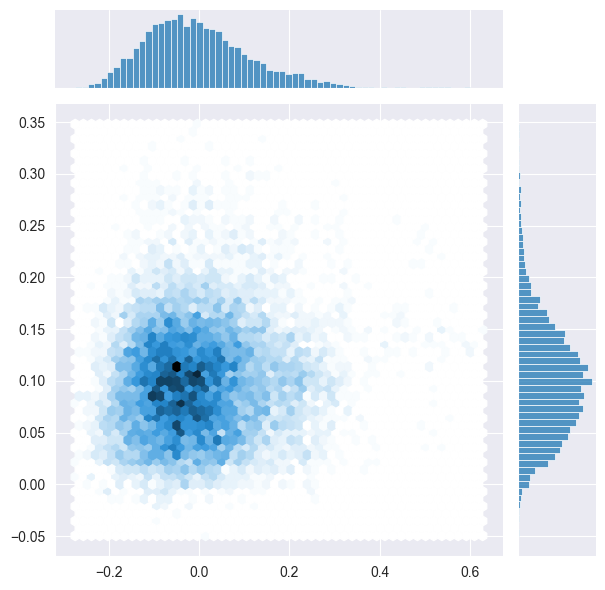

In [8]:
import seaborn as sns
kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind='hex')
plt.show()

# Run the method ` run_halos_without_kde()` to obtain kappa and gamma values without using KDE.

 This will generate ` n_iterations` sets of halo lists under the specified `sky_area`.
 For each set, it will simulate `samples_number` times to get the kappa and gamma values
 at the origin. The obtained values will be directly appended without any additional processing.

In [13]:
from sim_pipeline.Halos.halos_plus_glass import run_halos_without_kde_by_multiprocessing
from astropy.cosmology import FlatLambdaCDM,default_cosmology
import matplotlib.pyplot as plt

cosmo = default_cosmology.get()

nk,ng = run_halos_without_kde_by_multiprocessing(n_iterations=400, sky_area=0.0001, samples_number=2,cosmo=cosmo,m_max='1.0E+16',m_min='1.0E+12', z_max=5)


The 400 halo-lists took 166.4506711959839 seconds to run


Visualization of ` run_halos_without_kde()`

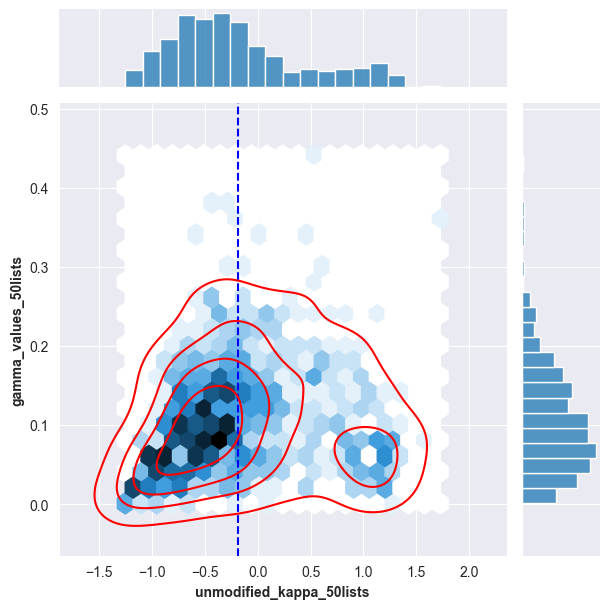

Spearman correlation coefficient:  0.22602267347292734
Kendall Tau correlation coefficient:  0.158648310387985


In [14]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
modified_plot = sns.jointplot(x=nk, y=ng,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.axvline(x=np.mean(nk), color='blue', linestyle='--')
modified_plot.ax_joint.set_xlabel('unmodified_kappa_50lists', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_50lists', fontweight='bold')
plt.show()
print('Spearman correlation coefficient: ', spearmanr(nk, ng)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(nk, ng)[0])